## BELGIUM TSC WITH TENSOR FLOW CNN


Vamos a implementar la Neural Network del artículo de Walled Abdulla

## UPLOADING EL DATASET

Vamos a subir el dataset en una Python list

In [1]:
import os
import random
import skimage.data
import skimage.transform
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import csv

# Allow image embeding in notebook
%matplotlib inline

In [2]:
def load_data(data_dir):
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]

    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    
    return images, labels

In [3]:
train_data_dir = ".\\data\\Training"            
X_train_orig, Y_train_orig = load_data(train_data_dir)

In [4]:
test_data_dir = ".\\data\\Testing" 
X_test_orig, Y_test_orig = load_data(test_data_dir)

In [5]:
print('len(X_train_orig): ',len(X_train_orig))
print('len(X_train_orig[0]): ',len(X_train_orig[0]))
print('len(Y_train_orig): ',len(Y_train_orig))
print('len(X_test_orig): ',len(X_test_orig))
print('len(Y_test_orig): ',len(Y_test_orig))

len(X_train_orig):  4575
len(X_train_orig[0]):  141
len(Y_train_orig):  4575
len(X_test_orig):  2520
len(Y_test_orig):  2520


Son listas Python.  
En el archivo de Train, tenemos 4575 ejemplos (imágenes). Cada imagen tiene unas dimensiones diferentes.  
En el archivo de Test tenemos 2520 ejemplos.

## MODELO

Este modelo está inspirado en el de Walled Abdulla.  
Una única capa de 62 nodos (el número de categorias).

In [6]:
#RESIZING THE IMAGE TO 32x32
X_train_32 = [skimage.transform.resize(image, (32, 32))
                for image in X_train_orig]

D:\ANACONDA\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [7]:
X_train_WA = np.array(X_train_32)
Y_train_WA = np.array(Y_train_orig)
print('len(Y_train_orig)',len(Y_train_orig))
print("Y_train_WA.shape: ", Y_train_WA.shape)
print('len(X_train_orig)',len(X_train_32))
print("X_train_WA.shape: ", X_train_WA.shape)

len(Y_train_orig) 4575
Y_train_WA.shape:  (4575,)
len(X_train_orig) 4575
X_train_WA.shape:  (4575, 32, 32, 3)


In [8]:
# Create a graph to hold the model.
graph = tf.Graph()

# Create model in the graph.
with graph.as_default():
    # Placeholders for inputs and labels.
    images_ph = tf.placeholder(tf.float32, [None, 32, 32, 3])
    labels_ph = tf.placeholder(tf.int32, [None])

    # Flatten input from: [None, height, width, channels]
    # To: [None, height * width * channels] == [None, 3072]
    images_flat = tf.contrib.layers.flatten(images_ph)

    # Fully connected layer. 
    # Generates logits of size [None, 62]
    logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

    # Convert logits to label indexes (int).
    # Shape [None], which is a 1D vector of length == batch_size.
    predicted_labels = tf.argmax(logits, 1)

    # Define the loss function. 
    # Cross-entropy is a good choice for classification.
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=labels_ph, logits=logits))

     
    # Create training op.
    train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

    # And, finally, an initialization op to execute before training.
    # TODO: rename to tf.global_variables_initializer() on TF 0.12.
    init = tf.initialize_all_variables()


print("images_flat: ", images_flat)
print("logits: ", logits)
print('labels_ph',labels_ph)
print("loss: ", loss)
print("predicted_labels: ", predicted_labels)

D:\ANACONDA\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use `tf.global_variables_initializer` instead.
images_flat:  Tensor("Flatten/Reshape:0", shape=(?, 3072), dtype=float32)
logits:  Tensor("fully_connected/Relu:0", shape=(?, 62), dtype=float32)
labels_ph Tensor("Placeholder_1:0", shape=(?,), dtype=int32)
loss:  Tensor("Mean:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax:0", shape=(?,), dtype=int64)


In [9]:
# Create a session to run the graph we created.
session = tf.Session(graph=graph)

# First step is always to initialize all variables. 
# We don't care about the return value, though. It's None.
_ = session.run([init])

In [10]:
for i in range(201):
    _, loss_value = session.run([train, loss], 
                                feed_dict={images_ph: X_train_WA, labels_ph: Y_train_WA})
    if i % 10 == 0:
        print("Loss ",i,": ", loss_value)

Loss  0 :  4.2088757
Loss  10 :  2.8372202
Loss  20 :  2.3061311
Loss  30 :  2.0502396
Loss  40 :  1.8985277
Loss  50 :  1.7971058
Loss  60 :  1.7212753
Loss  70 :  1.6611918
Loss  80 :  1.6119653
Loss  90 :  1.5705376
Loss  100 :  1.5348762
Loss  110 :  1.5037293
Loss  120 :  1.4762628
Loss  130 :  1.4517865
Loss  140 :  1.4298087
Loss  150 :  1.4099482
Loss  160 :  1.3919038
Loss  170 :  1.3754334
Loss  180 :  1.3603325
Loss  190 :  1.3464277
Loss  200 :  1.3335865


In [11]:
# Transform the images, just like we did with the training set.
X_test_WA = [skimage.transform.resize(image, (32, 32))
                 for image in X_test_orig]
Y_test_WA=np.array(Y_test_orig)

D:\ANACONDA\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [12]:
# Run predictions against the full test set.
predicted = session.run([predicted_labels], 
                        feed_dict={images_ph: X_test_WA})[0]

# Calculate how many matches we got.
match_count = sum([int(y == y_) for y, y_ in zip(Y_test_WA, predicted)])
accuracy = match_count / len(Y_test_WA)
print("Accuracy: {:.3f}".format(accuracy))
session.close()

Accuracy: 0.733


Al ser un modelo muy simple la "accuracy" varia mucho. Vamos a ver cuanto varía.

In [13]:
for w in range(10):
    # Create a session to run the graph we created.
    session = tf.Session(graph=graph)

    # First step is always to initialize all variables. 
    # We don't care about the return value, though. It's None.
    _ = session.run([init])
    for i in range(201):
        _, loss_value = session.run([train, loss], 
                                    feed_dict={images_ph: X_train_WA, labels_ph: Y_train_WA})
    
    # Run predictions against the full test set.
    predicted = session.run([predicted_labels], 
                            feed_dict={images_ph: X_test_WA})[0]
    # Calculate how many matches we got.
    match_count = sum([int(y == y_) for y, y_ in zip(Y_test_WA, predicted)])
    accuracy = match_count / len(Y_test_WA)
    print("Accuracy for the",w,"th try:", accuracy)
    session.close()

Accuracy for the 0 th try: 0.44722222222222224
Accuracy for the 1 th try: 0.6730158730158731
Accuracy for the 2 th try: 0.6757936507936508
Accuracy for the 3 th try: 0.5984126984126984
Accuracy for the 4 th try: 0.5321428571428571
Accuracy for the 5 th try: 0.515079365079365
Accuracy for the 6 th try: 0.7186507936507937
Accuracy for the 7 th try: 0.6083333333333333
Accuracy for the 8 th try: 0.5845238095238096
Accuracy for the 9 th try: 0.5638888888888889


Según el autor la exactitud varia entre 0.4 y 0.7 en función de si cae en un mínimo local o absoluto.

## EVALUACIÓN DEL MODELO

Cogemos 10 imágenes del train_set al azahar.  
Obtenemos sus predicciones.  
Y las comparamos con sus "labels" correspondientes.

In [14]:
#ANTERIORMENTE HEMOS CERRADO LA SESSION DE TENSORFLOW, AHORA TENEMOS QUE VOLVER A CARGARLO TODO
sess = tf.Session(graph=graph)
_ = sess.run([init])


for i in range(201):
    train_value, loss_value = sess.run([train, loss], 
                                feed_dict={images_ph: X_train_WA, labels_ph: Y_train_WA})

#10 imágenes al azahr
sample_indexes = random.sample(range(len(X_train_WA)),10)
sample_images = [X_train_WA[i] for i in sample_indexes]
sample_labels = [Y_train_WA[i] for i in sample_indexes]

#predicciones de las 10 imágenes
predicted = sess.run([predicted_labels],
                      feed_dict={images_ph: sample_images})[0]

print('train_value',train_value)
print('sample_labels',sample_labels)
print('predicted',predicted)

train_value None
sample_labels [37, 25, 53, 21, 32, 40, 14, 19, 38, 40]
predicted [37 32 53 22 32 41 13 19 38 41]


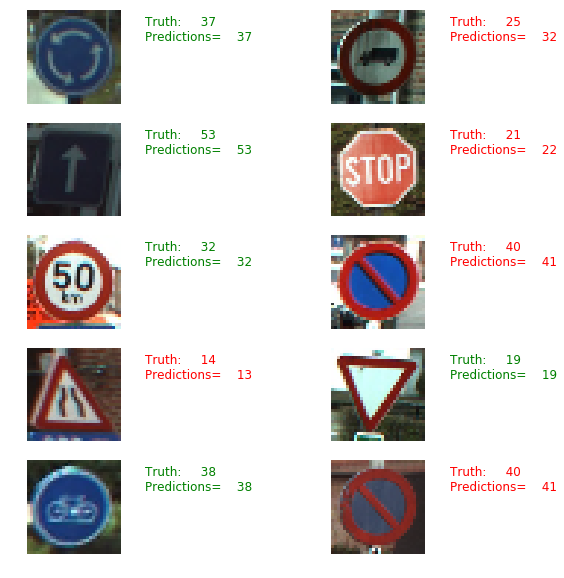

In [15]:
fig = plt.figure(figsize=(10,10))
for i in range(len(sample_images)):
    truth=sample_labels[i]
    predictions = predicted[i]
    plt.subplot(5,2,i+1)
    plt.axis('off')
    color='green' if truth == predictions else 'red'
    plt.text(40,10, 'Truth:     {0}\nPredictions=    {1}'.format(truth,predictions),
            fontsize=12, color=color)
    plt.imshow(sample_images[i])